In [ ]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data='/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/'

In [ ]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

#Data Augumentation


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Specify the path to your original dataset
original_dataset_path = '/content/drive/MyDrive/Tuberculosis_final-Copy/TB_Chest_Radiography_Database/Tuberculosis'

# Specify the path to store the augmented dataset
augmented_dataset_path = '/content/drive/MyDrive/tb'

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Ensure the output directory for augmented images exists
if not os.path.exists(augmented_dataset_path):
    os.makedirs(augmented_dataset_path)

# List all files in the original dataset directory
original_images = os.listdir(original_dataset_path)

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Adjust target size as needed
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, height, width, channels) for flow() method
    return img_array

# Generate augmented images
for img_file in original_images:
    img_path = os.path.join(original_dataset_path, img_file)
    img = load_and_preprocess_image(img_path)

    # Generate augmented images and save to the output directory
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=augmented_dataset_path, save_prefix='Tuberculosis', save_format='jpg'):
        i += 1
        if i >= 4:  # Generate 4 augmented images per original image
            break

# After running this code, you should have an augmented dataset with approximately 2500 images in the 'augmented_dataset_path' directory.


In [ ]:
images[:20]

['/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/45.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/827.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/387.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/72.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/348.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/799.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/936.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/722.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/650.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiog

In [ ]:
len(images)

5420

In [ ]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])
#Extracting Class Values

In [ ]:
class_values[:10]

['Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis']

In [ ]:
len(class_values)

5420

In [ ]:
temp = list(zip(images,class_values))
#Zipping Image Paths and Class Labels
random.shuffle(temp)
#reordering ensures that the pairing of image paths and class labels is maintained
images, class_values = zip(*temp)
#Unzipping the Shuffled Data
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])
#Creating a Pandas DataFrame

In [ ]:
data

,image_path,class_label
0,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
1,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
3,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
...,...,...
5415,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5416,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5417,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5418,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis


In [ ]:
data.class_label.value_counts()

class_label
Normal          3504
Tuberculosis    1916
Name: count, dtype: int64

In [ ]:
df_c0 = data[data['class_label'] =="Tuberculosis"]
df_c1 = data[data['class_label'] =="Normal"]

In [ ]:
from sklearn.utils import resample
unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=1916)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=3500)
#each containing 100 samples randomly drawn with replacement from their respective original datasets

In [ ]:
df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1])
df_unsampled

,image_path,class_label
1676,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2112,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
3002,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2691,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4307,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
...,...,...
1709,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2189,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4925,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4925,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal


In [ ]:
df_unsampled.head()

,image_path,class_label
1676,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2112,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
3002,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2691,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4307,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis


In [ ]:
df_unsampled.tail()

,image_path,class_label
1709,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2189,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4925,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4925,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4669,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal


In [ ]:
df_unsampled.class_label.value_counts()

class_label
Normal          3500
Tuberculosis    1916
Name: count, dtype: int64

In [ ]:
df_unsampled.shape

(5416, 2)

In [ ]:
data = df_unsampled.sample(frac=1)
data.shape

(5416, 2)

In [ ]:
data[:10]

,image_path,class_label
1602,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2365,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4170,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2411,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
3471,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2089,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4427,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4529,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2623,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4258,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal


<ipython-input-22-2d1eefe42530>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
<ipython-input-22-2d1eefe42530>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

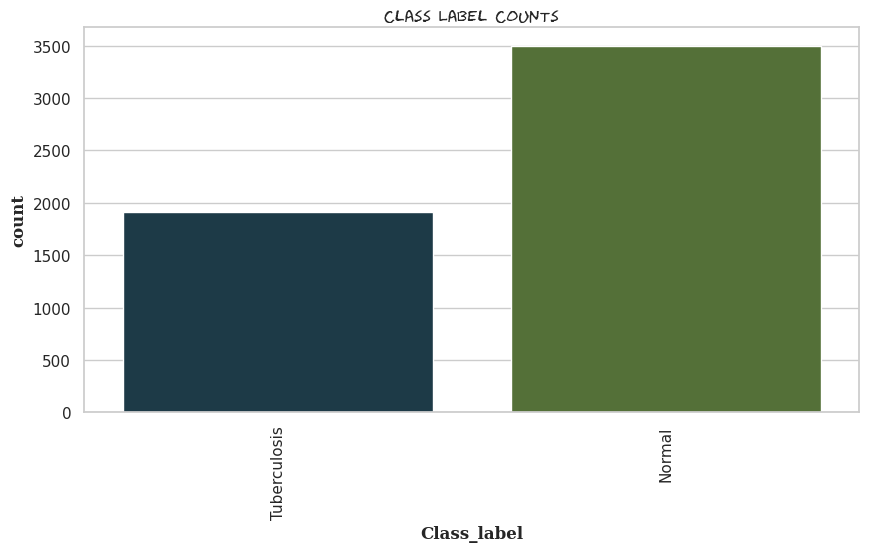

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm  # Optional, for progress bar

def resize_image(img_path):
    file = cv2.imread(img_path)
    resized = cv2.resize(file, (224, 224), interpolation=cv2.INTER_AREA)
    return resized

# Assuming data['image_path'] contains the paths of the original images
images = [resize_image(img_path) for img_path in tqdm(data['image_path'], desc="Resizing images")]

# Convert the list of images to a single NumPy array
images_array = np.stack(images, axis=0)

# Now, images_array is a single NumPy array containing all the resized images
print(images_array.shape)


Resizing images: 100%|██████████| 5416/5416 [35:16<00:00,  2.56it/s]


(5416, 224, 224, 3)


In [ ]:
len(images)

5416

In [ ]:
data['class_label'][:15]

1602          Normal
2365          Normal
4170          Normal
2411          Normal
3471          Normal
2089          Normal
4427    Tuberculosis
4529    Tuberculosis
2623          Normal
4258          Normal
23      Tuberculosis
3320    Tuberculosis
3157    Tuberculosis
4975    Tuberculosis
1466          Normal
Name: class_label, dtype: object

In [ ]:
class_names = list(data['class_label'])

In [ ]:
  images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'Normal')

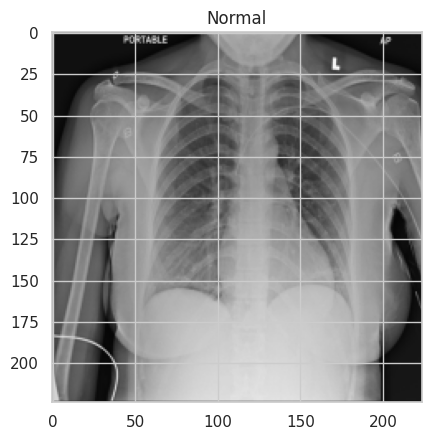

In [ ]:
plt.imshow(images[86])
plt.title(class_names[86])

Text(0.5, 1.0, 'Normal')

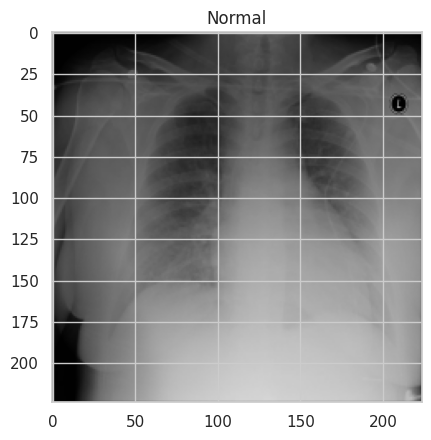

In [ ]:
plt.imshow(images[188])
plt.title(class_names[188])

In [ ]:
images = np.array(images)

In [ ]:
images.shape

(5416, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])
# y contain the binary representation of the class labels

In [ ]:
enc.classes_

array(['Normal', 'Tuberculosis'], dtype='<U12')

In [ ]:
data['class_label'][:10]

1602          Normal
2365          Normal
4170          Normal
2411          Normal
3471          Normal
2089          Normal
4427    Tuberculosis
4529    Tuberculosis
2623          Normal
4258          Normal
Name: class_label, dtype: object

In [ ]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [ ]:
y=np.array(y)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, stratify=y, random_state=43)

In [ ]:
y_train[:5]

array([[0],
       [1],
       [1],
       [0],
       [1]])

In [ ]:
y = []
for i in data['class_label']:
    if i == 'Normal':
        k = [1, 0]
        y.append(k)
    else:
        k = [0, 1]
        y.append(k)

In [ ]:
y[:5]

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]

In [ ]:
y=np.array(y)
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, stratify=y, random_state=43)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4332, 224, 224, 3), (4332, 2), (1084, 224, 224, 3), (1084, 2))

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4332, 224, 224, 3), (4332, 2), (1084, 224, 224, 3), (1084, 2))

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Flatten y_train to a 1D array
y_train_flat = y_train.ravel()

# Assuming binary classification, compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_flat), y=y_train_flat)
class_weight_dict = dict(enumerate(class_weights))

#data

In [ ]:
test_path = '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/'
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16
#The dimension of the images we are going to define is 500x500 img_height = 500
img_height = 224
img_width = 224
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                rescale = 1./255,
                                #shear_range = 0,
                                #zoom_range = 0,
                                horizontal_flip = True,
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,
      class_mode='binary',
      batch_size=batch_size
      )

Found 5420 images belonging to 2 classes.


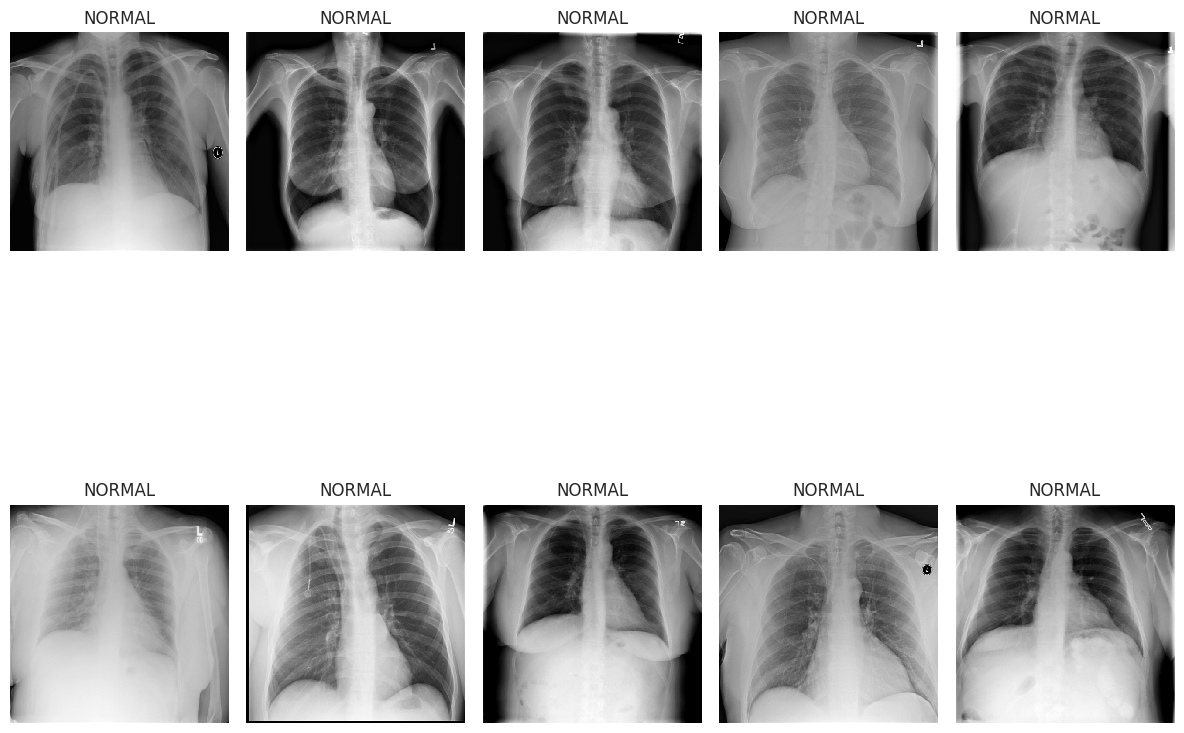

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in test:
        image = X_batch[0]
        dic = {0:'NORMAL', 1:'TUBERCULOSIS'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

#Dense Net

29084464/29084464 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               6422656   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                       

Epoch 1/10
34/34 [==============================] - 52s 1s/step - loss: 6.8413 - accuracy: 0.6849 - val_loss: 0.5769 - val_accuracy: 0.7159
Epoch 2/10
34/34 [==============================] - 15s 433ms/step - loss: 0.6360 - accuracy: 0.6928 - val_loss: 0.4015 - val_accuracy: 0.8939
Epoch 3/10
34/34 [==============================] - 15s 432ms/step - loss: 0.4993 - accuracy: 0.7798 - val_loss: 0.2230 - val_accuracy: 0.9041
Epoch 4/10
34/34 [==============================] - 17s 502ms/step - loss: 0.4289 - accuracy: 0.7950 - val_loss: 0.0634 - val_accuracy: 0.9659
Epoch 5/10
34/34 [==============================] - 17s 505ms/step - loss: 0.4166 - accuracy: 0.8022 - val_loss: 0.1531 - val_accuracy: 0.8607
Epoch 6/10
34/34 [==============================] - 17s 504ms/step - loss: 0.4224 - accuracy: 0.7523 - val_loss: 0.0609 - val_accuracy: 0.9530
Epoch 7/10
34/34 [==============================] - 17s 505ms/step - loss: 0.3689 - accuracy: 0.8102 - val_loss: 0.1093 - val_accuracy: 0.9133
Ep

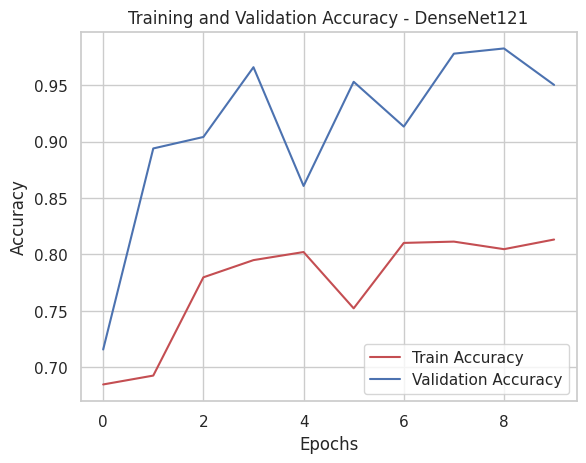

Test accuracy: 0.9501845240592957
34/34 [==============================] - 5s 91ms/step


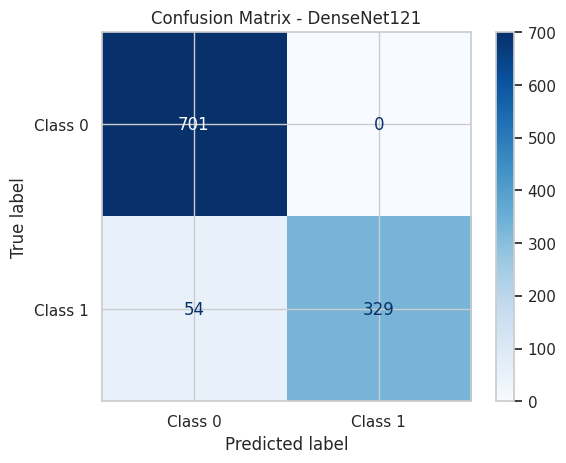

In [ ]:
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Import the DenseNet121 model
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet.trainable = False

# Set the DenseNet121 model with modifications
model_densenet = Sequential()
model_densenet.add(densenet)
model_densenet.add(Flatten())

model_densenet.add(Dense(128, activation='relu'))
model_densenet.add(Dropout(0.5))
model_densenet.add(Dense(64, activation='relu'))
model_densenet.add(Dropout(0.5))
model_densenet.add(Dense(2, activation='softmax'))
model_densenet.summary()

# Compile the model with a lower learning rate
model_densenet.compile(optimizer=Adam(lr=0.00001), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model with more epochs
History_densenet = model_densenet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

# Plot the accuracy plot for the model
plt.plot(History_densenet.history['accuracy'], 'r', label='Train Accuracy')
plt.plot(History_densenet.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy - DenseNet121')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate and print test accuracy for the model
score_densenet = model_densenet.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_densenet[1])

# Plot the confusion matrix for the model
y_pred_densenet = model_densenet.predict(x_test)
y_pred_classes_densenet = np.argmax(y_pred_densenet, axis=1)
y_true_densenet = np.argmax(y_test, axis=1)
cm_densenet = confusion_matrix(y_true_densenet, y_pred_classes_densenet)
disp_densenet = ConfusionMatrixDisplay(confusion_matrix=cm_densenet, display_labels=['Class 0', 'Class 1'])
disp_densenet.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix - DenseNet121')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
model_densenet.save('/content/drive/MyDrive/saved_models/m4_new.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Prediction for DenseNet

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/saved_models/m4_new.h5')

# Predict on x_test
y_pred = loaded_model.predict(x_test)

# Convert predictions to binary values (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Accuracy:', accuracy)

# Calculate other metrics
report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Classification Report:\n', report)



34/34 [==============================] - 5s 91ms/step
Accuracy: 0.9501845018450185
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       701
           1       1.00      0.86      0.92       383

    accuracy                           0.95      1084
   macro avg       0.96      0.93      0.94      1084
weighted avg       0.95      0.95      0.95      1084



#CNN

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

Epoch 1/10
34/34 [==============================] - 685s 20s/step - loss: 2.3139 - accuracy: 0.7170 - val_loss: 0.3096 - val_accuracy: 0.8672
Epoch 2/10
34/34 [==============================] - 636s 19s/step - loss: 0.3184 - accuracy: 0.8684 - val_loss: 0.2232 - val_accuracy: 0.9105
Epoch 3/10
34/34 [==============================] - 672s 20s/step - loss: 0.2698 - accuracy: 0.8915 - val_loss: 0.3599 - val_accuracy: 0.8256
Epoch 4/10
34/34 [==============================] - 635s 19s/step - loss: 0.2235 - accuracy: 0.9137 - val_loss: 0.1577 - val_accuracy: 0.9308
Epoch 5/10
34/34 [==============================] - 676s 20s/step - loss: 0.3104 - accuracy: 0.8832 - val_loss: 0.2399 - val_accuracy: 0.8773
Epoch 6/10
34/34 [==============================] - 679s 20s/step - loss: 0.1991 - accuracy: 0.9174 - val_loss: 0.1640 - val_accuracy: 0.9419
Epoch 7/10
34/34 [==============================] - 684s 20s/step - loss: 0.1514 - accuracy: 0.9446 - val_loss: 0.1581 - val_accuracy: 0.9419
Epoch 

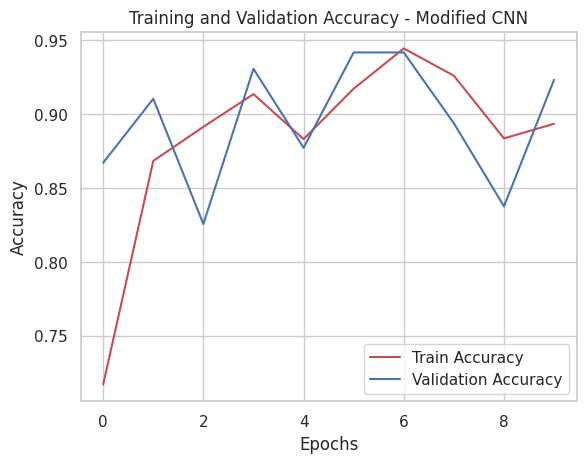

Test accuracy: 0.9234317541122437
34/34 [==============================] - 44s 1s/step


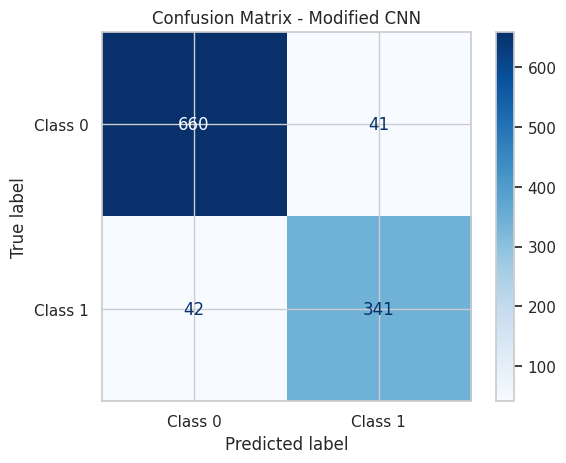

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the CNN model with additional layers
model_cnn_modified = Sequential()

# Convolutional layers
model_cnn_modified.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn_modified.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn_modified.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn_modified.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn_modified.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn_modified.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn_modified.add(Conv2D(256, (3, 3), activation='relu'))
model_cnn_modified.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model_cnn_modified.add(Flatten())

# Dense layers. activation adds nonlinearity to the network
model_cnn_modified.add(Dense(512, activation='relu'))
model_cnn_modified.add(Dropout(0.5))

model_cnn_modified.add(Dense(256, activation='relu'))
model_cnn_modified.add(Dropout(0.5))

model_cnn_modified.add(Dense(128, activation='relu'))
model_cnn_modified.add(Dropout(0.5))

# Output layer
model_cnn_modified.add(Dense(2, activation='softmax'))

model_cnn_modified.summary()

# Compile the modified model
model_cnn_modified.compile(optimizer=Adam(lr=0.00001), loss="binary_crossentropy", metrics=["accuracy"])

# Train the modified model
History_cnn_modified = model_cnn_modified.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

# Plot the accuracy plot for the modified model
plt.plot(History_cnn_modified.history['accuracy'], 'r', label='Train Accuracy')
plt.plot(History_cnn_modified.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Modified CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate and print test accuracy for the modified model
score_cnn_modified = model_cnn_modified.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_cnn_modified[1])

# Plot the confusion matrix for the modified model
y_pred_cnn_modified = model_cnn_modified.predict(x_test)
y_pred_classes_cnn_modified = np.argmax(y_pred_cnn_modified, axis=1)
y_true_cnn_modified = np.argmax(y_test, axis=1)
cm_cnn_modified = confusion_matrix(y_true_cnn_modified, y_pred_classes_cnn_modified)
disp_cnn_modified = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_modified, display_labels=['Class 0', 'Class 1'])
disp_cnn_modified.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix - Modified CNN')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from prettytable import PrettyTable


# Evaluate and print precision, recall, F1 score, and accuracy for the modified model
y_pred_cnn_modified = model_cnn_modified.predict(x_test)
y_pred_classes_cnn_modified = np.argmax(y_pred_cnn_modified, axis=1)
y_true_cnn_modified = np.argmax(y_test, axis=1)

precision = precision_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average='binary', pos_label=1)
recall = recall_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average='binary', pos_label=1)
f1 = f1_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average='binary', pos_label=1)
accuracy_class_0 = accuracy_score(y_true_cnn_modified[y_true_cnn_modified == 0], y_pred_classes_cnn_modified[y_true_cnn_modified == 0])
accuracy_class_1 = accuracy_score(y_true_cnn_modified[y_true_cnn_modified == 1], y_pred_classes_cnn_modified[y_true_cnn_modified == 1])

# Overall accuracy
accuracy_overall = accuracy_score(y_true_cnn_modified, y_pred_classes_cnn_modified)

# Create a table
metrics_table = PrettyTable()
metrics_table.field_names = ['Metric', 'Normal', 'Tuberculosis', 'Overall']
metrics_table.add_row(['Precision', precision_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average=None)[0], precision_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average=None)[1], precision])
metrics_table.add_row(['Recall', recall_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average=None)[0], recall_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average=None)[1], recall])
metrics_table.add_row(['F1 Score', f1_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average=None)[0], f1_score(y_true_cnn_modified, y_pred_classes_cnn_modified, average=None)[1], f1])
metrics_table.add_row(['Accuracy', accuracy_class_0, accuracy_class_1, accuracy_overall])

print(metrics_table)


34/34 [==============================] - 44s 1s/step
+-----------+--------------------+--------------------+--------------------+
|   Metric  |       Normal       |    Tuberculosis    |      Overall       |
+-----------+--------------------+--------------------+--------------------+
| Precision | 0.9401709401709402 | 0.8926701570680629 | 0.8926701570680629 |
|   Recall  | 0.9415121255349501 | 0.8903394255874674 | 0.8903394255874674 |
|  F1 Score | 0.9408410548823949 | 0.8915032679738562 | 0.8915032679738562 |
|  Accuracy | 0.9415121255349501 | 0.8903394255874674 | 0.9234317343173432 |
+-----------+--------------------+--------------------+--------------------+


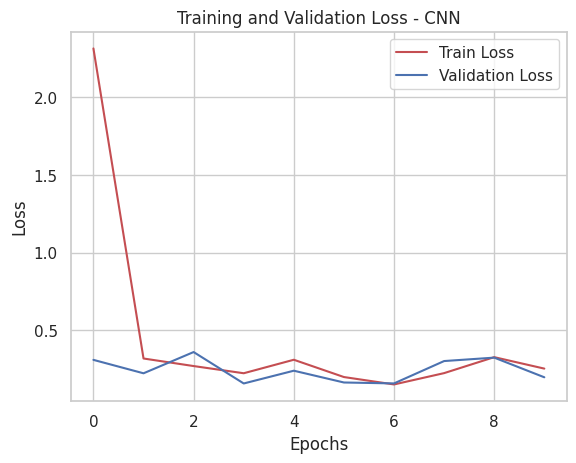

In [ ]:
plt.plot(History_cnn_modified.history['loss'], 'r', label='Train Loss')
plt.plot(History_cnn_modified.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss - CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


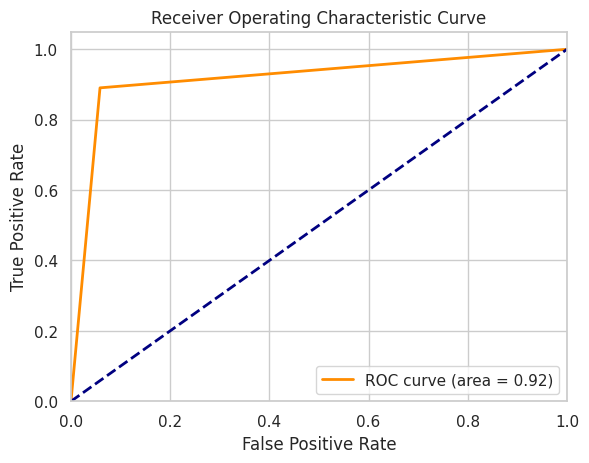

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true_cnn_modified, y_pred_classes_cnn_modified)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
model_cnn_modified.save('/content/drive/MyDrive/saved_models/m5_new(1).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Prediction for CNN

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/saved_models/m5_new(1).h5')

# Predict on x_test
y_pred = loaded_model.predict(x_test)

# Convert predictions to binary values (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Accuracy:', accuracy)

# Calculate other metrics
report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Classification Report:\n', report)



34/34 [==============================] - 3s 29ms/step
Accuracy: 0.9234317343173432
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       701
           1       0.89      0.90      0.89       383

    accuracy                           0.92      1084
   macro avg       0.92      0.92      0.92      1084
weighted avg       0.92      0.92      0.92      1084



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Read the data from the CSV file skipping the first row
file_path = '/content/drive/MyDrive/features.csv'
df = pd.read_csv(file_path, header=None, skiprows=1, names=['feature_0', 'feature_1', 'Class'])

# Convert data types to numeric (if necessary)
df['feature_0'] = pd.to_numeric(df['feature_0'], errors='coerce')
df['feature_1'] = pd.to_numeric(df['feature_1'], errors='coerce')
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Split the data into features (X) and target variable (y)
X = df[['feature_0', 'feature_1']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with class weights
class_weights = {0: 1, 1: 4}  # You can adjust the weights based on the class distribution
model = LogisticRegression(class_weight=class_weights)

# Train the model on the scaled training set
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7071428571428572
Confusion Matrix:
[[2817  710]
 [ 520  153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3527
           1       0.18      0.23      0.20       673

    accuracy                           0.71      4200
   macro avg       0.51      0.51      0.51      4200
weighted avg       0.74      0.71      0.72      4200



#prediction


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the pre-trained model
model_path = '/content/drive/MyDrive/saved_models/m1_new.h5'
model = load_model(model_path)

# Function to preprocess the input image
def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming your model expects 224x224 images
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values to the range [0, 1]
    return img_array

# Function to make predictions using the pre-trained model
def predict_tuberculosis(model, img_path):
    input_image = preprocess_input_image(img_path)
    prediction = model.predict(input_image)
    return prediction

# Specify the path to the input image
input_image_path = '/content/drive/MyDrive/Tuberculosis_extracted/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-419.png'

# Make prediction
prediction = predict_tuberculosis(model, input_image_path)

# Output the prediction
if prediction[0][0] > 0.5:  # Assuming the model output is a probability (adjust threshold as needed)
    print("The input image indicates tuberculosis.")
else:
    print("The input image does not indicate tuberculosis.")


1/1 [==============================] - 2s 2s/step
The input image indicates tuberculosis.


In [ ]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess the image
img_path = '/content/drive/MyDrive/Tuberculosis_extracted/TB_Chest_Radiography_Database/Normal/Normal-1000.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255. # Rescale pixel values to [0, 1]
# Predict the class probabilities

model_path = '/content/drive/MyDrive/saved_models/m1_new.h5'
model = load_model(model_path)

pred_prob = model.predict(img_array)[0][0]
# Convert predicted probability to class label
if pred_prob < 0.5:
  predicted_class = 'Tuberculosis'
else:
  predicted_class = 'Normal'
print("Predicted Class:", predicted_class)



1/1 [==============================] - 1s 1s/step
Predicted Class: Normal
